In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.rc('font',family='serif')

In [2]:
d=1000 # d: dimension
n=2000 # n: number of points
A = np.random.normal(size=(n,d)) / np.sqrt(n) # matrix containing the data points
y = np.random.normal(size=n)
lambd= 1

We consider the Ridge cost function:
$$
f(x) = \frac{1}{2} \|Ax-y\|^2 + \frac{\lambda}{2} \|x\|^2,
$$
where $\lambda > 0$ is some regularization parameter that we take equal to $1$. The matrix $A$ and the vector $y$ are defined in the cell above.

**(a)** Show that $f$ is can be written in the format the function $f$ of Problem 12.2, for some $M \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$ and $c \in \mathbb{R}$. Compute numerically the values of $L$ and $\mu$. Plot the eigenvalues of $H_f(x)$ using an histogram.

L equals to 3.8616696074385555 and mu equals to 1.087054478201926.


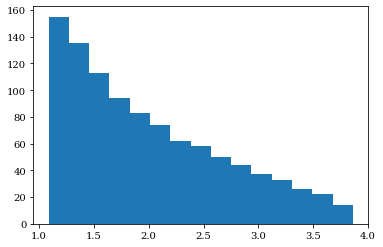

In [3]:
M = A.T @ A + lambd * np.identity(d)
values, vectors = np.linalg.eig(M)

L = max(values)
mu = min(values)

print('L equals to ' + str(L) + ' and mu equals to '+ str(mu) + '.')

plt.hist(values, bins = 15);

**(b)** Implement gradient descent with constant step-size $\beta = 1/L$ (as in Problem 12.2), with random initial position $x_0$. Plot the log-error $\log (\|x_t - x_*\|)$ as a function of $t$.

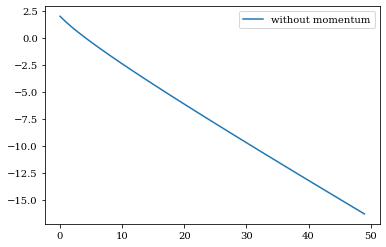

In [4]:
#Initiate x_0
cur_x = np.zeros(d)

#Compute x*
b = A.T @ y
x_star = np.linalg.inv(M) @ b

#Initiate parameters
rate = 1/L 
max_iters = 50
iters = 0 
df = lambda x: M @ x - b 

#Iteration
x_ts = [] #store history x's
while iters < max_iters:
    prev_x = cur_x 
    cur_x = cur_x - rate * df(prev_x) 
    iters += 1 
    x_ts.append(cur_x)
    
#Compute errors
error = [] 
for x in x_ts:
    error.append(np.log(np.linalg.norm(x - x_star)))
    
#Plot errors
t = list(range(50))
plt.plot(t, error, label = 'without momentum');
plt.legend();

**(c)** Implement gradient descent with momentum, with the same parameters as in Problem 12.4. Plot the log-error $\log (\|x_t - x_*\|)$ as a function of $t$, on the same plot than the log-error of gradient descent without momentum.
On the same plot, plot also the lines of equation
$$
y = \log(1-\mu / L) \times t \qquad \text{and} \qquad
y = \log\Big(\frac{\sqrt{L}-\sqrt{\mu}}{\sqrt{L}+\sqrt{\mu}}\Big) \times t.
$$

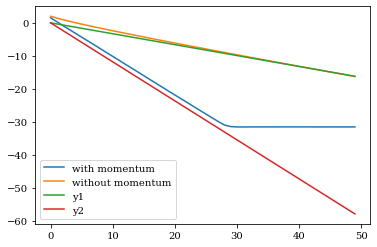

In [5]:
#Initiate parameters
beta = 4 / (np.sqrt(L)+np.sqrt(mu))**2
gamma = ((np.sqrt(L)-np.sqrt(mu)) / (np.sqrt(L)+np.sqrt(mu)))**2

x = np.zeros(d)
v = np.zeros(d)
error_m = []

#Iteration
iters = 0
while iters < max_iters:
    v = - beta * df(x) + gamma * v
    x = x + v
    error_m.append(np.log(np.linalg.norm(x - x_star)))    
    iters += 1
    
#Set x-axis
t = list(range(50))

#Initiate wo lines of equation
y_1, y_2 = [], []
for t_ in t:
    y_1.append(np.log(1-mu/L) * t_)
    y_2.append(np.log((np.sqrt(L)-np.sqrt(mu)) / (np.sqrt(L)+np.sqrt(mu))) * t_)
    
#Plot errors and y_functions
plt.plot(t, error_m, label = 'with momentum');
plt.plot(t, error, label = 'without momentum');
plt.plot(t, y_1, label = 'y1');
plt.plot(t, y_2, label = 'y2');
plt.legend();